# İlk Derin Öğrenme Modelimiz: MNIST Rakam Sınıflandırma

Bu örnekte, el yazısı rakamları tanıyan basit bir derin öğrenme modeli oluşturacağız. MNIST veri setini kullanarak, 0-9 arasındaki rakamları sınıflandıran bir sinir ağı geliştireceğiz.

## 1. Gerekli Kütüphanelerin İçe Aktarılması

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-02-08 18:03:42.911963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739027022.946672   21700 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739027022.957185   21700 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 18:03:42.987642: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


> [!NOTE]
> TensorFlow, derin öğrenme modelimizi oluşturmak için kullanacağımız ana kütüphane.
> NumPy, veri manipülasyonu için, Matplotlib ise görselleştirme için kullanılacak.

## 2. Veri Setinin Yüklenmesi ve Ön İşleme

In [2]:
# MNIST veri setini yükle
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Görüntüleri normalize et (0-1 arasına ölçekle)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print('Eğitim veri seti boyutu:', x_train.shape)
print('Test veri seti boyutu:', x_test.shape)

Eğitim veri seti boyutu: (60000, 28, 28)
Test veri seti boyutu: (10000, 28, 28)


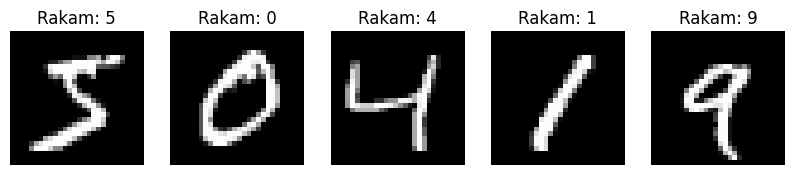

<Figure size 640x480 with 0 Axes>

In [21]:
# Rastgele 5 görüntüyü görselleştir
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Rakam: {y_train[i]}')
    plt.axis('off')
plt.show()
plt.savefig("images/output-01.png")

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [5]:
model = Sequential()
    # Giriş katmanı - görüntüyü düzleştir
model.add(Flatten(input_shape=(28, 28)))
    # Gizli katman 1
model.add(Dense(128, activation='relu'))
    # Dropout katmanı - aşırı öğrenmeyi önlemek için
model.add(Dropout(0.2))
    # Gizli katman 2
model.add(Dense(64, activation='relu'))
    # Çıkış katmanı - 10 sınıf için (0-9 rakamları)
model.add(Dense(10, activation='softmax'))

/home/abdullatif/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-08 18:03:52.157739: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-02-08 18:03:52.157808: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: kaban
2025-02-08 18:03:52.157823: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: kaban
2025-02-08 18:03:52.157960: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 565.77.0
2025-02-08 18:03:52.158002: I external/local_xla/xla/stream_executor/cuda/cuda_diagnos

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model özetini görüntüle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10


2025-02-08 18:04:50.107211: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8348 - loss: 0.5457 - val_accuracy: 0.9567 - val_loss: 0.1442
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9537 - loss: 0.1485 - val_accuracy: 0.9690 - val_loss: 0.1017
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9675 - loss: 0.1072 - val_accuracy: 0.9668 - val_loss: 0.1099
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9712 - loss: 0.0898 - val_accuracy: 0.9711 - val_loss: 0.1006
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9763 - loss: 0.0733 - val_accuracy: 0.9754 - val_loss: 0.0866
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9790 - loss: 0.0650 - val_accuracy: 0.9754 - val_loss: 0.0891
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9812 - loss: 0.0569 - val_accuracy: 0.9774 - val_loss: 0.0862
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9826 - loss: 0.0522 - val_accurac

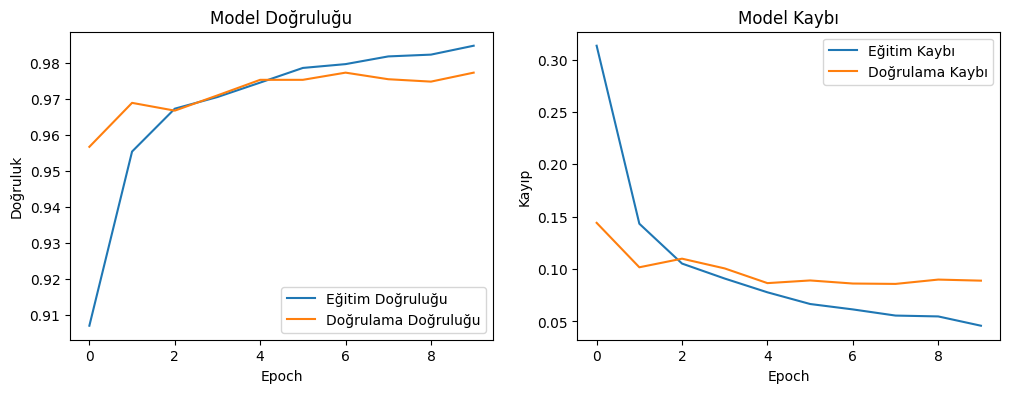

In [8]:
plt.figure(figsize=(12, 4))

# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()

plt.show()

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest Doğruluğu: {test_accuracy:.4f}')


Test Doğruluğu: 0.9794


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


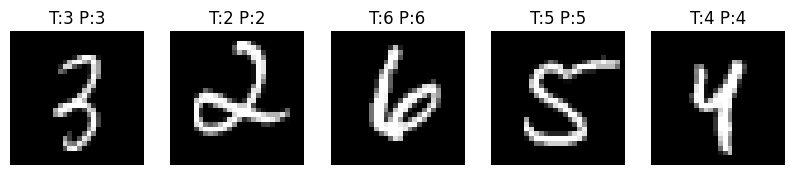

In [19]:
# Test setinden rastgele 5 görüntü seç ve tahmin yap
test_images = x_test[515:520]
predictions = model.predict(test_images)

plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i+515]
    plt.title(f'T:{true_label} P:{pred_label}')
    plt.axis('off')
plt.show()